<a href="https://colab.research.google.com/github/yexf308/AppliedStatistics/blob/main/7_LASSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline 
import pandas as pd
from scipy import linalg
from itertools import combinations
import scipy

Populating the interactive namespace from numpy and matplotlib


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$



# Simple Variable Selection LASSO: Sparse Regression
### Feature selection
Why we want to perform feature selection? 
- Efficiency: 
 - if size($\m{w}$)$=10^7$, training/prediction are very expensive. 

 - If $\m{w}$ is **sparse** (i.e., many entries are zero), prediction computation only depends on number of non-zeros. $\hat{y}^{(i)}= \sum_{\hat{\m w}_j\ne 0} \hat{\m w}_j h_j(\m{x}^{(i)})$.

- Interpretability: Which features are relevant for prediction?
<img src="https://github.com/yexf308/AppliedStatistics/blob/main/image/lasso1.png?raw=true" width="600" />



### Exhaustive approach: all subset
The most naive approach is to take all subset and perform the linear regression on all of them. However, if we have $d$ features, there are in total $2^d$ models (why?). It is computationally intractable to perform all subset regressions. 

### Greedy approach: forward stepwise
Starting from simple model and iteratively add features most useful
to fit.
- Pick a dictionary of features $h_1(\m{x}), h_2(\m{x}), \dots, h_d(\m{x})$.

- Greedy heuristic:
  - Start from empty (or simple) set of
features $F_0 = \emptyset$.

  - Run learning algorithm for current set
of features $F_t$ and obtain weights for these features. 

  - Select next best feature $h_j(\m{x})$, i.e., the feature results in lowest training/testing
error when learning with $F_t + \{h_j(\m{x})\}$.

  - $F_{t+1} \leftarrow  F_t + \{h_j(\m{x})\}$ and recurse.



**Backward stepwise**:
Start with full model and iteratively remove features least useful to fit

Combining forward and backward steps:
In forward algorithm, insert steps to remove features no longer as
important. 

But the greedy approach will not result in optimal features. There are many more elaborate methods out there. Also the method has the issue that when do you stop. (when training/testing error is low enough?)

## Regularization
Can we use regularization for feature selection?
- Start with full model (all possible features).

- Shrink some coefficients exactly to 0, i.e., knock out certain features. 

- Non-zero coefficients indicate selected features. 

### Regularization approach: Ridge

Ridge regression makes coefficients small, but not exactly 0. 
\begin{align}
\ell(\m{w},\lambda) = \underbrace{\|\mathbf{X}\mathbf{w}-\mathbf{y}\|_2^2}_{\text{measure of fit}}+\lambda\underbrace{\|\m{w}\|_2^2}_{\text{measure of magnitude of coefficients}}
\end{align} 

One possible solution is to set small ridge coefficients to 0. 
But from the following example, you can see there is a big issue. 
### Example

1. we just set small ridge coefficients to 0.
<img src="https://github.com/yexf308/AppliedStatistics/blob/main/image/lasso_house1.png?raw=true" width="600" />

2. Selected features for a given threshold value
<img src="https://github.com/yexf308/AppliedStatistics/blob/main/image/lasso_house2.png?raw=true" width="600" />

If we look at these two related features. 

<img src="https://github.com/yexf308/AppliedStatistics/blob/main/image/lasso_house3.png?raw=true" width="600" />

If only one of the features had been included. 

<img src="https://github.com/yexf308/AppliedStatistics/blob/main/image/lasso_house4.png?raw=true" width="600" />

It is not a good idea to threshold ridge coefficients. Can regularization lead directly to sparsity?

##  Least Absolute Shrinkage and Selection Operator (LASSO)

However, sometimes we want the parameters to not just be small, but to
be exactly zero, i.e, $\hat{\mathbf{w}}$ to be sparse. In other words, we want to minimize the **L0-norm**, 
$$ \|\mathbf{w}\|_0=\sum_{i=1}^d\mathbb{1}(|w_i|>0)$$

But this is not convex! It is also very hard to optimize. 

**Motivation:** MAP estimation with a Laplace prior - $\ell_1$ regularization. 

\begin{align}
p(\m{w}|\lambda) \propto \Pi_{i=1}^d \exp(-\lambda |w_i|)
\end{align}
where $\lambda$ is the sparsity/regularization parameter. The loss function becomes 
\begin{align}
\ell(\m{w},\lambda) = -\log p(\c{D}|\m{w})-\log p(\m{w}|\lambda) = \|\mathbf{X}\mathbf{w}-\mathbf{y}\|_2^2+\lambda\|\m{w}\|_1
\end{align}
where $\|\m{w}\|_1 = \sum_{i}^d |w_i|$, it is **$\ell_1$-regularization**. 

Just like ridge regression, solution is governed by a
continuous parameter $\lambda$. 
-  $\lambda=0, \hat{\m w}_{\text{lasso}}=\hat{\m w}_{\text{ls}}$.

- $\lambda = +\infty, \hat{\m w}_{\text{lasso}} = 0$.

- If $\lambda$ in between, $0\le \|\hat{\m w}_{\text{lasso}}\|_1 \le \|\hat{\m w}_{\text{ls}}\|_1$. 

**$\qquad\qquad$(Left) Ridge   $\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad$ (Right) LASSO**

<img src="https://github.com/yexf308/AppliedStatistics/blob/main/image/lasso_house5.png?raw=true" width="500" />
<img src="https://github.com/yexf308/AppliedStatistics/blob/main/image/lasso_house6.png?raw=true" width="500" />

## Why $l_1$ regularization yield sparse solution?
The LASSO objective is 
\begin{align}
 \min_{\m{w}}\ell(\m{w},\lambda)=\min_{\m{w}}\|\mathbf{X}\mathbf{w}-\mathbf{y}\|_2^2+\lambda\|\m{w}\|_1
\end{align}
It is the Lagrangian for the following constraint optimization, 
\begin{align}
\min_{\m{w}}\|\mathbf{X}\mathbf{w}-\mathbf{y}\|_2^2 \qquad \text{subject to } \|\m{w}\|_1\le B
\end{align}
where $B$ is the upper bound on the $\ell_1-$norm of the weights. (small $B$ $\leftrightarrow$ large penalty $\lambda$)

The ridge objective is 
\begin{align}
 \min_{\m{w}}\ell(\m{w},\lambda)=\min_{\m{w}}\|\mathbf{X}\mathbf{w}-\mathbf{y}\|_2^2+\lambda\|\m{w}\|_2^2
\end{align}
It is the Lagrangian for the following constraint optimization, 
\begin{align}
\min_{\m{w}}\|\mathbf{X}\mathbf{w}-\mathbf{y}\|_2^2 \qquad \text{subject to } \|\m{w}\|_2^2\le B
\end{align}


We plot the contours of the loss functions, as well as the contours of the $l_1$ and $l_2$ constraint surface. From the theory of constrained optimization, we know
that the optimal solution occurs at the point where the lowest level set of the objective function
intersects the constraint surface.

<img src="https://github.com/yexf308/MAT592/blob/main/image/lasso.png?raw=true" width="700" />

For $q< 1$, we can get even sparser solutions, but the problem becomes non-convex. So $l_1$-norm is the tightest convex relaxation of $l_0$-norm. Note LASSO is not strictly convex so the solution may not be unique. 


<img src="https://github.com/yexf308/MAT592/blob/main/image/lasso1.png?raw=true" width="390" />
<img src="https://github.com/yexf308/MAT592/blob/main/image/lasso2.png?raw=true" width="400" />

## Fitting the lasso regression model (for given $\lambda$)

Unlike the previous models, no closed-form solution exists due to the fact that the loss function is no longer continuously differentiable (non-smooth absolute component $|w_i|$).

We have to solve this optimization problem **numerically**!

## Algorithm 1: Pathwise Coordinate Descent (aka shooting algorithm)
**Basic Idea:**  To optimize a parameter at a time holding all other parameters constant. This method is particularly good if it is hard to find minimum for all coordinates, but **easy for each coordinate**. 

<img src="https://github.com/yexf308/AppliedStatistics/blob/main/image/CD1.png?raw=true" width="200" />

**Algorithm:** To minimize function $\ell(\m{w})$

Initialize $\hat{\m{w}}=0$ or smartly
   
  - While not converged
    - Pick a coodinate j (at "random" or "round robin" ..), 
     \begin{align}
     \hat{w_j} \leftarrow \min_{w} \ell(\hat{w}_1, \dots, \hat{w}_{j-1}, w, \hat{w}_{j+1}, \hat{w}_d) 
     \end{align} 

**NO Stepsize to choose**!

\\

Now let's solve this optimization one coordinate at a time. 

\begin{align}
\frac{\partial}{\partial w_j} \text{RSS}(\m{w}) = \frac{\partial}{\partial w_j} \|\mathbf{X}\mathbf{w}-\mathbf{y}\|_2^2 &= 2\m{X}_j^\top (\m{X}\m{w}-\m{y}) = 2\m{X}_j^\top(\m{X}_j w_j +\m{X}_{-j}\m{w}_{-j}-\m{y}) \\ 
&=  \underbrace{2\m{X}_j^\top \m{X}_j}_{\triangleq a_j} w_j - \underbrace{2\m{X}_j^\top (\m{y}-\m{X}_{-j}\m{w}_{-j}) }_{\triangleq c_j}\\
\frac{\partial}{\partial w_j} |w_j| &=\begin{cases}1 & \text{if }w_j >0 \\ -1 & \text{if } w_j< 0 \\ [-1,1] &\text{if } w_j=0 \end{cases}
\end{align}

Then 
\begin{align}
\frac{\partial}{\partial w_j} \ell(\m{w},\lambda) =  \begin{cases}(a_j w_j - c_j)+\lambda & \text{if } w_j >0 \\ (a_j w_j - c_j)- \lambda & \text{if } w_j < 0 \\ [-c_j-\lambda, -c_j+\lambda] & \text{if } w_j = 0 \end{cases} 
\end{align}


where $\mathbf{w}_{-j}$ is $\mathbf{w}$ without component $j$ and similarly $\mathbf{X}_{-j}$ is the data matrix $\mathbf{X}$ without column $j$.

We see that $c_j$ is proportional to the correlation between $j$’th column of features $\mathbf{X}_j$ and the
residual error obtained by predicting using all the other features, $\mathbf{r}_{-j}= \mathbf{y}-\mathbf{X}_{-j}\mathbf{w}_{-j}$. Hence the
magnitude of $c_j$ is an indication of how relevant feature $j$ is for predicting $\mathbf{y}$, relative to the other
features and the current parameters.


So the solution of the gradient being zero depends on $c_j$,
\begin{align}
\hat{w}_j(c_j)&= \begin{cases}(c_j+\lambda)/a_j & \text{if } c_j<-\lambda \\
0 & \text{if } \lambda>c_j>-\lambda  \\ 
(c_j-\lambda)/a_j & \text{if } c_j>\lambda  \end{cases} \\
&= \text{sign}\left(\frac{c_j}{a_j}\right)\max\left(\left|\frac{c_j}{a_j}\right|-\frac{\lambda}{a_j},0\right) \\ 
&= \text{SoftThreshold}\left(\frac{c_j}{a_j},\frac{\lambda}{a_j}\right)
\end{align}
This is called **soft thresholding**. 

We plot the solution as follows. The dotted black line is the line $w_j = c_j/a_j$. corresponding to the least squares fit. The solid red line, which represents the regularized
estimate $\hat{w}_j$, shifts the dotted line down (or up) by $\lambda$, except when $-\lambda\le c_j\le \lambda$, in which case it sets $\hat{w}_j=0$.

<img src="https://github.com/yexf308/MAT592/blob/main/image/soft_threshold.png?raw=true" width="300" />


### Algorithm revisted

Initialize $\hat{\m{w}}=0$ or smartly
  - Precompute for all coordiate j
     $$ a_j = \m{X}_j^\top \m{X}_j $$ 
  - While not converged
    - Pick a coodinate j (at "random" or "round robin" ..), compute

     \begin{align}
     & c_j = \m{X}_j^\top (\m{y}-\m{X}_{-j}\m{w}_{-j}) \\
     & \hat{w}_j = \text{SoftThreshold}\left(\frac{c_j}{a_j},\frac{\lambda}{a_j}\right)
     \end{align} 

There are many other algorithms solves LASSO. 
- **Projected gradient descent**
   - split variable trick, $w=w^{+}-w^{-}$, where $w^+ =\max\{w,0\}$ and $w^- = -\max\{w,0\}$. Now $\|\m{w}\|_1 = \sum_d (w_d^+ +w_d^-)$. 
   - The objective function to minimize becomes the constrained, optimization problem. 
   \begin{align}
   \min_{\m{w}^+\ge 0, \m{w}^{-}\ge 0} \text{NLL}(\m{w}^+ - \m{w}^-) +\lambda \sum_d (w_d^++w_d^-)
   \end{align}

   - We can solve it with projected gradient descent,
   \begin{align}
   \bcm \m{w}_{t+1}^+ \\\m{w}_{t+1}^- \ecm = P_+\left( \bcm \m{w}_{t}^+ \\\m{w}_{t}^- \ecm + \bcm -\eta_t \nabla \text{NLL}(\m{w}_{t}^+ -\m{w}_{t}^- ) \\ +\eta_t\nabla \text{NLL}(\m{w}_{t}^+ -\m{w}_{t}^- ) \ecm -\eta_t\lambda \mb{1}\right) 
   \end{align}
   

- **LARS**: homotopy method for lasso. 

### Debiasing
**LASSO is a biased estimator!**

A simple solution to the biased estimate problem, known as debiasing, is to use a two-stage
estimation process:

- Estimate the support of the weight vector (i.e., identify which elements
are non-zero) using lasso.

- Re-estimate the chosen coefficients using least squares.

### How to choose $\lambda$?
- Hold out.
- Cross-validation.

What the range of $\lambda$?
- $\lambda=0$, $\hat{\m{w}}=\hat{\m{w}}_{\text{LS}}$.

- $\lambda> \lambda_{\text{cr}}$, $\hat{\m{w}}=\m{0}$. 
This critical value is obtained when the gradient of the NLL cancels out with the gradient of the penalty. 
\begin{align}
\lambda_{\text{max}} = \max_{j}|\nabla_{w_j}\text{RSS}(\m{0})| = \max_{j}|\m{X}_j^\top \m{y}|  = \|\m{X}^\top \m{y}\|_{\infty}
\end{align}
Then the range of $\lambda$ is $[0, \lambda_{\text{max}}]$. 

## Tips in coding
- For-loops can be slow whereas vector/matrix computation in Numpy is very optimized; exploit this as
much as possible.

- The pseudocode provided has many opportunities to speed up computation by precomputing quantities
like $a_j$ before the for loop. These small changes can speed things up considerably.

- As a sanity check, ensure the objective value is nonincreasing with each step.

- It is up to you to decide on a suitable stopping condition. A common criteria is to stop when no element
of $\m{w}$ changes by more than some small tolerance during an iteration. If you need your algorithm to run faster, an
easy place to start is to loosen this condition.

- You will need to solve the Lasso on the same dataset for many values of $\lambda$. This is called a regularization
path. One way to do this efficiently is to start at a large $\lambda$, and then for each consecutive solution, initialize
the algorithm with the previous solution, decreasing $\lambda$ by a constant ratio (e.g., by a factor of 1.2) until
finished.



In [2]:
def qr_solve(X, y):
    Q, R = np.linalg.qr(X)
    Qy = np.dot(Q.T, y)
    return scipy.linalg.solve_triangular(R, Qy)

In [57]:
def lasso(X, y, lam, tol=1e-6):

  """The Lasso Regression model
      Pathwise coordinate descent with co-variance updates is applied.

      X - NumPy matrix, size (N, d), of standardized numerical predictors, note the first column is ones.
      y - NumPy array, length N, of numerical response.
      lam - L1 penalty tuning parameter (positive scalar)
      tol - Coordinate Descent convergence tolerance (exited if change < tol)

  """
  d     = X.shape[1]
  w_s   = zeros(d)
  iter  = 0

  a     = zeros(d)
  index = []
  for j in range(d):
    a[j]     = sum(X[:,j]**2)
    index.append(list(range(0,j)) + list(range(j+1,d)))

  while True:
    w_pre = w_s.copy()

    for j in range(d): 
      c_j     = np.dot(X[:,j].T, y-np.dot(X[:,index[j]],w_s[index[j]])) # this is not optimal, try to optimize as much as possible.
      update  = c_j/a[j]
      w_s[j]  = np.sign(update) * max(abs(update) - lam/a[j], 0)  

    iter = iter + 1
    if np.all(abs(w_s-w_pre)<tol):
      #print('Number of iteration is ', iter)
      break

  return w_s    



In [130]:
# same data as before 
np.random.seed(0)
N = 35
x = np.linspace(0.0, 20, N)
X0 = x.reshape(N, 1)
w = np.array([-1.5, 1 / 9.0])
y = w[0] * x + w[1] * np.square(x)
y = y + np.random.normal(0, 1, N) * 2


# let's try  6th order polynomial 
d = 6
X        = np.ones((N, 1))
for i in range(1,d+1):
  X   = np.hstack([X, X0**i])

In [131]:
# feature scaling
# Rescaling data with min and max
def MinMaxScaler(X):
  N = X.shape[0]
  d = X.shape[1]
  Y = zeros([N,d])
  for i in range(d):
    Xi = X[:,i]
    if max(Xi) - min(Xi) != 0:
      Y[:,i] = (Xi - min(Xi) )/(max(Xi) - min(Xi))
    else:
      Y[:,i] = ones(N)
        
  return Y 

In [132]:
Xtrain_s = MinMaxScaler(X)
lam_max = norm(Xtrain_s.T.dot(y), np.inf)
lam_span = linspace(1, lam_max-0.1, 100) #lam_max*(1/1.2)**arange(25)
w_hat_store = zeros([100, d+1])


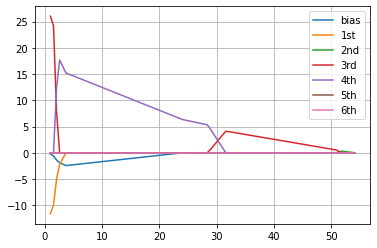

In [133]:
# let's do a simple test
for lam_idx, lam in enumerate(lam_span):
  w_hat = lasso(Xtrain_s, y, lam)
  w_hat_store[lam_idx] = w_hat


fig, ax = plt.subplots()
for i in range(d+1):
  ax.plot(lam_span, w_hat_store[:,i])

ax.legend(['bias','1st','2nd','3rd','4th','5th','6th'])
grid()    






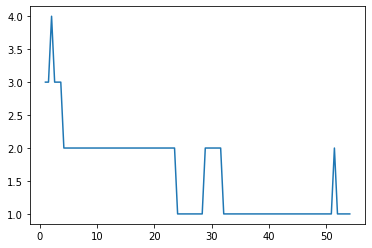

In [134]:
w_nonzero = zeros(100)
nonzero_entry=[]
for i in range(100):
  w_nonzero[i]= count_nonzero(w_hat_store[i])
  nonzero_entry.append(list(nonzero(w_hat_store[i])[0]))

# plot no. of nonzeros
plt.plot(lam_span, w_nonzero)  
plt.show()

## Subset selection

In [145]:
# extract these unique of these nonzero features
unique_data = [list(x) for x in set(tuple(x) for x in nonzero_entry)]
unique_data

[[0, 1, 3, 4], [2], [3], [4], [0, 1, 3], [2, 3], [0, 1, 4], [0, 4], [3, 4]]

In [136]:
# we add more test data, 200 datapoints. 
xtest = np.arange(0.0, 20, 0.1)
N     = xtest.shape[0]
Xtest0 = xtest.reshape(N, 1)
w = np.array([-1.5, 1 / 9.0])
ytest = w[0] * xtest + w[1] * np.square(xtest)
ytest = ytest + np.random.normal(0, 1, N) * 2

d = 10
Xtest        = np.ones((N, 1))
for i in range(1,d+1):
  Xtest   = np.hstack([Xtest, Xtest0**i])

Xtest_s = MinMaxScaler(Xtest) 

In [137]:
# use testing data to check which features perform the best
L = len(unique_data)
error_store = zeros(L)
for i in range(L):
  Xtrain_s_i = Xtrain_s[:, unique_data[i]]
  w_i = qr_solve(Xtrain_s_i, y)
  ytest_i = Xtest_s[:,unique_data[i]].dot(w_i)
  error_store[i] = sum((ytest-ytest_i)**2)


In [156]:
argmin(error_store)

4

In [154]:
Xtrain_s_i = Xtrain_s[:, unique_data[4]]
w_i = qr_solve(Xtrain_s_i, y)
ytest_i = Xtest_s[:,unique_data[4]].dot(w_i)

In [155]:
print(unique_data[4])


[0, 1, 3]


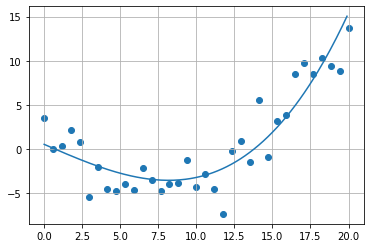

In [157]:
fig, ax = plt.subplots()
ax.scatter(X[:,1], y)
ax.plot(Xtest[:,1],ytest_i)
grid()

## Elastic net (ridge and lasso combined)
Sometimes these features may have group structure, we would like highly correlated coefficients to be treated as an
implicit group. We can use elastic net which is hybrid of lasso and ridge. 
The objective function is 
\begin{align}
\ell(\m{w},\lambda_1, \lambda_2)= \|\m{X}\m{w}-\m{y}\|_2^2 +\lambda_1\|\m{w}\|_1 + \lambda_2 \|\m{w}\|_2^2
\end{align}

This penalty function is strictly convex (assuming  $\lambda_2 > 0$) so there is a unique global minimum, even
if $\m{X}$ is not full rank. In fact, any strictly convex penalty on $\m{w}$ will exhibit a
grouping effect, which means that the regression coefficients of highly correlated variables tend to be equal. 

For example, if $\m{X}_k=\m{X}_j$ for $j$-th and $k$-th columns, one can show that their
estimates are also equal $w_j=w_k$. But in lasso, we may have $w_j=0$ but $w_k\ne 0$, which is not stable. 

## Summary
-  Least square.
   - Likelihood: Gaussian
   - Prior: Uniform

- Robust Regression.
  - Likelihood: Laplace
  - Prior: Uniform

- Ridge
  - Likelihood: Gaussian
  - Prior: Gaussian

- Lasso
  - Likelihood: Gaussian
  - Prior: Laplace        
